In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 

## <font color='red'> 1. Generating correlated random variables: In this experiment take 3 zero mean, unit variance, uncorrelated random Gaussian random variables. Obtain the transformation matrix $A$ in $Y = A \times X$ transformation so that $Y$ have specified covariance matrix. (Take any valid covariance matrix in this case)<font>
Hint: $$Y=AX$$ $$C_Y=AC_XA^T$$ Digonalize $$C_Y=U\Sigma U^{-1}$$ So, $$U\Sigma^{\frac{1}{2}}\Sigma^{\frac{1}{2}} U^{-1}=AC_XA^T$$ If, $X$ is uncorrelated then $C_X$ must be identity

Hint for Code: Use np.linalg.eig,np.diag,np.matmul,np.cov

In [10]:
no_samples = 1000
x1 = np.random.randn(no_samples)
x2 = np.random.randn(no_samples)
x3 = np.random.randn(no_samples)
X = np.concatenate((np.array([x1]),np.array([x2]),np.array([x3])),axis=0)
Cx = np.cov(X)
print("Cx=",Cx)
Cy = np.array([[1 , 0.8 ,0.5],
               [0.8 , 1 , 0.8],
              [0.5,0.8,1]])
print("Cy=",Cy)
#write code here
w, v =LA.eig(Cy)
w = w*np.eye(3)
A = np.dot(v,np.sqrt(w))
Yn = np.dot(A,X)
Cynew = np.cov(Yn)
print("Cy_new=",Cynew)


Cx= [[ 0.97314162 -0.0133255  -0.00182774]
 [-0.0133255   1.0543121  -0.02783247]
 [-0.00182774 -0.02783247  0.99168866]]
Cy= [[1.  0.8 0.5]
 [0.8 1.  0.8]
 [0.5 0.8 1. ]]
Cy_new= [[0.98650779 0.76804343 0.46702886]
 [0.76804343 0.97333429 0.78755192]
 [0.46702886 0.78755192 1.00186203]]


## <font color='red'> 2. Understand and implement PCA for image compression and recognition.<font> 
    Methodology: set of face images are to be used to generate basis matrix based on PCA, and the matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved.

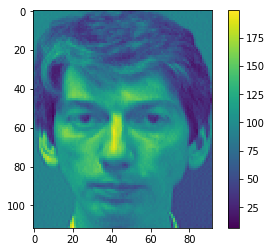

In [11]:
a=glob.glob('*.pgm')
X1 = mpimg.imread(a[0])
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X = X1.flatten()
X = np.zeros(shape=(np.size(a),m*n))
for i,j in zip(a,range(np.size(a))):
    X[j,:]=  mpimg.imread(i).flatten()



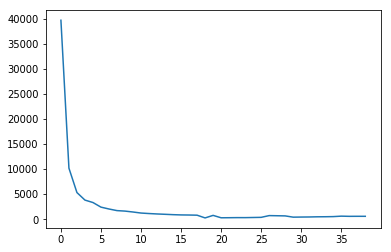

In [12]:
#covariance matrix
CV = np.cov(X)
[eig,U] = LA.eig(CV)
plt.figure()
plt.plot(eig) 

mse= 13208.156147895046


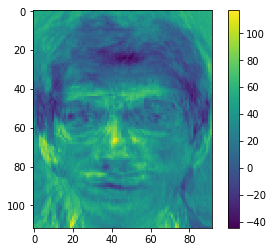

In [24]:
A = np.transpose(U)
Y = np.dot(A,X)
Yt = Y[1:int(np.floor(len(Y)/2)),:]
Ut = U[:,1:int(np.floor(len(U)/2))]
Xr = np.dot(Ut,Yt)
mse = np.mean((X-Xr)**2)
print("mse=",mse)
X1r = np.reshape(Xr[0,:],[m,n])
plt.imshow(X1r)
plt.colorbar()

## <font color='red'> 3. Implement PCA for remote sensing image.<font>
    Methodology: set of remotely sensed images (Cuprite hyperspectral data having 188 bands) are to be used to generate basis matrix based on PCA, and the matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved. Find the variance of the input and output in each case and note the observations.

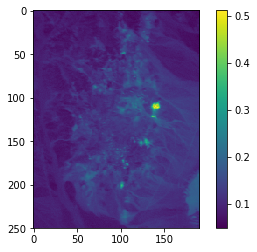

In [33]:
X = sio.loadmat('cuprite.mat')
X= X['x']
X1 = np.reshape(X,[188,191,250])
plt.figure()
plt.imshow(X1[1,:,:].T)
plt.colorbar()

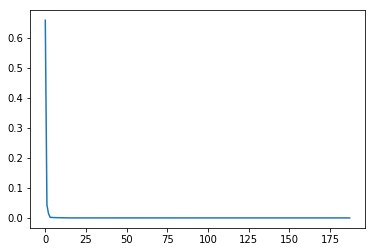

In [35]:
#covariance matrix
CV = np.cov(X)
[eig,U] = LA.eig(CV)
plt.figure()
plt.plot(eig) 

mse= 0.11945215053662663


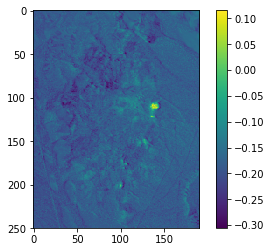

In [37]:
A = np.transpose(U)
Y = np.dot(A,X)
Yt = Y[1:int(np.floor(len(Y)/2)),:]
Ut = U[:,1:int(np.floor(len(U)/2))]
Xr = np.dot(Ut,Yt)

mse = np.mean((X-Xr)**2)
print("mse=",mse)
X1r = np.reshape(Xr[0,:],[191,250])
plt.imshow(X1r.T)
plt.colorbar()